# Diabetics Prediction

In [1]:
## Importing libreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Ther is no Null values, and has all numeric data types

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there is few columns Glucose, Insulin, Skin Thickness, BMI and BloodPressure which have value 0. which is not possible right? We can deal with them by removing those data or replace their values with mean values. 

In [5]:
## There is some features that can not be 0, so let's replce those cells with mean values.

df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

<AxesSubplot:>

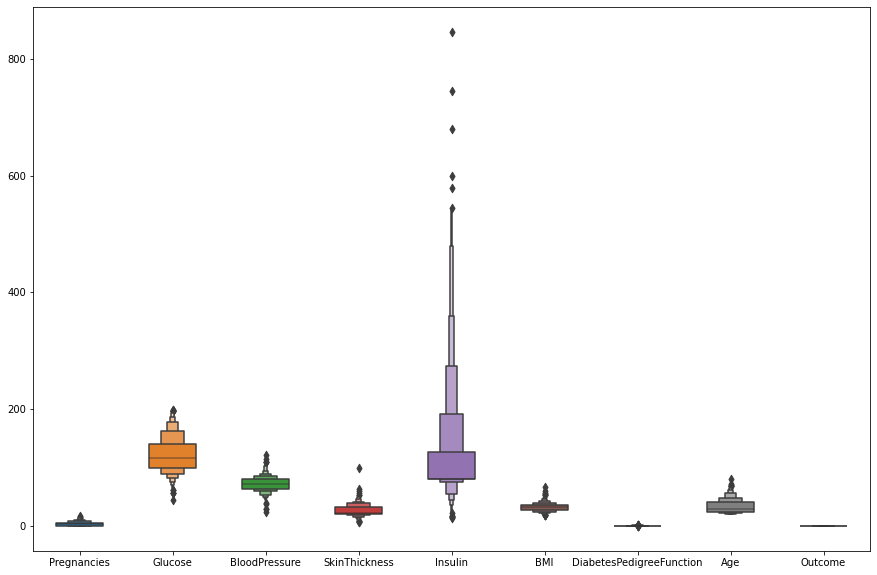

In [6]:
## Let's see if there is some outliers present or not

fig, ax = plt.subplots(figsize = (15, 10))
sns.boxenplot(data = df, width = 0.5, ax = ax)

we can see that my Insulin data have lots of outliers, So we are going to solve this letter

In [38]:
## splitting dependent and independent columns

x = df.drop(columns= ["Outcome"])
y = df["Outcome"]

In [39]:
## splitting the data to train and test the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=0)

In [40]:
import pickle
from sklearn.preprocessing import StandardScaler

def scaler_standard(x_train, x_test):
    # Scaling the data
    sts = StandardScaler()
    x_train_scale = sts.fit_transform(x_train)
    x_test_scale = sts.transform(x_test)

    # saving the model
    file = open("C:/Users/mohan/Downloads\Data_Science/ML_Regression/Logistic Regression/6/Model/StandardScaler.pkl", "wb")
    pickle.dump(sts, file)
    file.close()

    return x_train_scale, x_test_scale

In [41]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [42]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [43]:
## Decision Tree Model Training With Hyperparameter Tuning
import warnings
warnings.filterwarnings('ignore')

In [44]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [45]:
## Imoprting the Decision Tree classifier library

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [46]:
clf = GridSearchCV(classifier, param_grid= parameter, cv=3, scoring="accuracy", verbose=3)
clf.fit(x_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.667 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.703 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.609 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.635 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.708 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.641 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [47]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'random'}

In [48]:
classifier = DecisionTreeClassifier( criterion="gini", max_depth=2, max_features="log2", splitter="random" )

In [66]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features='log2', splitter='random')

In [67]:
## Support Vector Classifier With Hyperparameter Tuning
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [68]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3,scoring='accuracy')

grid.fit(x_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   1.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.2s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.7s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.3s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [69]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [70]:
svc_clf = SVC(C=0.1, gamma=1, kernel="linear")
svc_clf.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [75]:
## Naive Baye's Implementation
from sklearn.naive_bayes import BernoulliNB
nvb = BernoulliNB()

In [76]:
nvb.fit(x_train, y_train)

BernoulliNB()

Let's see how our model perform on the test data set.

In [77]:
##prediction
y_pred_tree = classifier.predict(x_test_scaled)
y_pred_svc = svc_clf.predict(x_test_scaled)
y_pred_nb = nvb.predict(x_test_scaled)

In [72]:
## Decision Tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[130   0]
 [ 62   0]]
0.6770833333333334
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       130
           1       0.00      0.00      0.00        62

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.40       192
weighted avg       0.46      0.68      0.55       192



In [78]:
## SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[130   0]
 [ 62   0]]
0.6770833333333334
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       130
           1       0.00      0.00      0.00        62

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.40       192
weighted avg       0.46      0.68      0.55       192



In [79]:
## Naive Bayes
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[  2 128]
 [ 10  52]]
0.28125
              precision    recall  f1-score   support

           0       0.17      0.02      0.03       130
           1       0.29      0.84      0.43        62

    accuracy                           0.28       192
   macro avg       0.23      0.43      0.23       192
weighted avg       0.21      0.28      0.16       192



In [81]:
file = open('C:/Users/mohan/Downloads/Data_Science/ML_Regression/Logistic Regression/6/Model/modelForPrediction.pkl','wb')
pickle.dump(classifier,file)
file.close()